# 🏥 Analyzing No-shows for Scheduled Medical Appointments

**Author**: _Emanuel Gabbay_

**Publishment Date**: _July 13th, 2022_

## 📃 Table of Contents

1. [Introduction](#intro)
2. [About the Data](#about)
3. [Examining the Data](#examine)
4. [Cleaning the Data](#clean)
5. [Adding Useful Data](#adddata)
6. [Exploring the Data](#explore)
7. [Conclusions](#conclusions)

## 📖 Introduction <a name="intro"></a>

In this project, I will wrangle and analyze a dataset about patients who scheduled a doctor's appointment and some of them didn't show (aka no-shows).

**Questions**
- How many no-shows are there (a proportion estimation)?
- What factors are correlated with no-shows?
- Does the proportion of no-shows among men is different than the proportion among women?
- Is there a difference in no-show proportions between people who got an SMS reminder and people who don't?
- How can we predict no-shows?

## ℹ About the Data <a name="about"></a>

The dataset contains 110,527 medical appointments that have been scheduled in Brazil, together with patient data, wether they received an SMS reminder for the meeting, and wether they showed up.

Data provided by Joni Hoppen and Aquarela Advanced Analytics Aquarela (source: [Kaggle](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia))

The variables:

- `PatientId` - The id of the patient
- `AppointmentID` - The id of the scheduled appointmnet
- `Gender` - The gender of the patient (F=Female; M=Male)
- `ScheduledDay` - The the date and time the appointment was scheduled (timestamp)
- `AppointmentDay` - The date of the appointment (timestamp; date only)
- `Age` - The age of the patient
- `Neighbourhood` - The neighbourhood where the appointment takes place
- `Scholarship` - Wether the patient is a member of the "Bolsa Família" program ([more info](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia); Binary data type)
- `Hipertension` - Wether the patient has hypertension (Binary data type)
- `Diabetes` - Wether the patient has diabetes (Binary data type)
- `Alcoholism` - Wether the patient is alcoholic (Binary data type)
- `Handcap` - The number of disabilities the patient has
- `SMS_received` - Wether the patient received an SMS reminder before the appointment (Binary data type)
- `No-show` - Wether the patient arrived to the appointment or not (Binary data type)

## 🔬 Examining the Data

I will start by going through the data, understand its structure and values, and finally will conclude what should be done in order to clean it, making it ready for analysis.

In [1]:
# import libraries
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# import CSV file to Pandas DataFrame
df = pd.read_csv(r'medical_appointments_may_2016.csv')

# Validating successful import, looking at the first 5 rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Looking at the structure of the DataFrame (number of rows and columns)
df.shape

(110527, 14)

In [4]:
# Looking at the data types and wether there is a missing data (nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Checking unique values of Gender
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [7]:
# Checking minimum value of ScheduledDay
df['ScheduledDay'].min()

'2015-11-10T07:13:56Z'

In [8]:
# Checking maximum value of ScheduledDay
df['ScheduledDay'].max()

'2016-06-08T20:07:23Z'

In [9]:
# Checking minimum value of AppointmentDay
df['AppointmentDay'].min()

'2016-04-29T00:00:00Z'

In [10]:
# Checking maximum value of AppointmentDay
df['AppointmentDay'].max()

'2016-06-08T00:00:00Z'

In [11]:
# Checking unique values of Age
ages = df['Age'].value_counts().sort_index()
for i in ages.index:
    print(i)

-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
102
115


In [12]:
# Checking the numbers of rows where age is -1
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
# Examine neighborhood names, check for value format, and correct syntax
neighborhoods = df['Neighbourhood'].value_counts().sort_index()
for i in neighborhoods.index:
    print(i)

AEROPORTO
ANDORINHAS
ANTÔNIO HONÓRIO
ARIOVALDO FAVALESSA
BARRO VERMELHO
BELA VISTA
BENTO FERREIRA
BOA VISTA
BONFIM
CARATOÍRA
CENTRO
COMDUSA
CONQUISTA
CONSOLAÇÃO
CRUZAMENTO
DA PENHA
DE LOURDES
DO CABRAL
DO MOSCOSO
DO QUADRO
ENSEADA DO SUÁ
ESTRELINHA
FONTE GRANDE
FORTE SÃO JOÃO
FRADINHOS
GOIABEIRAS
GRANDE VITÓRIA
GURIGICA
HORTO
ILHA DAS CAIEIRAS
ILHA DE SANTA MARIA
ILHA DO BOI
ILHA DO FRADE
ILHA DO PRÍNCIPE
ILHAS OCEÂNICAS DE TRINDADE
INHANGUETÁ
ITARARÉ
JABOUR
JARDIM CAMBURI
JARDIM DA PENHA
JESUS DE NAZARETH
JOANA D´ARC
JUCUTUQUARA
MARIA ORTIZ
MARUÍPE
MATA DA PRAIA
MONTE BELO
MORADA DE CAMBURI
MÁRIO CYPRESTE
NAZARETH
NOVA PALESTINA
PARQUE INDUSTRIAL
PARQUE MOSCOSO
PIEDADE
PONTAL DE CAMBURI
PRAIA DO CANTO
PRAIA DO SUÁ
REDENÇÃO
REPÚBLICA
RESISTÊNCIA
ROMÃO
SANTA CECÍLIA
SANTA CLARA
SANTA HELENA
SANTA LUÍZA
SANTA LÚCIA
SANTA MARTHA
SANTA TEREZA
SANTO ANDRÉ
SANTO ANTÔNIO
SANTOS DUMONT
SANTOS REIS
SEGURANÇA DO LAR
SOLON BORGES
SÃO BENEDITO
SÃO CRISTÓVÃO
SÃO JOSÉ
SÃO PEDRO
TABUAZEIRO
UNIVERSITÁ

In [14]:
# Check for unique Scholarship values (supposed to be 0 and 1)
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [15]:
# Check for unique Hipertension values (supposed to be 0 and 1)
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [16]:
# Check for unique Diabetes values (supposed to be 0 and 1)
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [17]:
# Check for unique Alcoholism values (supposed to be 0 and 1)
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [18]:
# Checking unique values of Handcap
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
# Checking unique values of SMS_received (supposed to be 0 and 1)
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [20]:
# Checking unique values of No-show
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

### Examination Conclusions 

- All columns (labels) should be reanamed to a lowercase format with underscores as word seperators
- Column names should better represent the data
- `PatientID` and `AppointmentID` columns should be conveted to string
- `ScheduledDay` and `AppointmentDay` columns should be converted to datetime
- `No-show` column should be converted to int (with zeros and ones instead of Yes and No)
- The row where `Age` is -1 should be dropped
- `Neighbourhood` column values should be renamed to title case
- Columns should be reordered in a more logical way
- Rows should be sorted by appointment id
- `ScheduledDay` timestamp should be truncated to day, as the time of scheduling is not relevant to this research

## 🧹 Cleaning the Data <a name="clean"></a>

In [21]:
# Renaming column names
new_columns = ['patient_id', 'appointment_id', 'gender', 'time_scheduled', 'appointment_date', 'age',
               'neighborhood', 'has_scholarship', 'has_hypertension', 'has_diabetes', 'is_alcoholic', 'num_of_disabilities',
               'did_receive_sms', 'no_show']
df.columns = new_columns


df.head()

,patient_id,appointment_id,gender,time_scheduled,appointment_date,age,neighborhood,has_scholarship,has_hypertension,has_diabetes,is_alcoholic,num_of_disabilities,did_receive_sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
# Reorder columns to a more logical order (appointment data, patient data, reminder, show/no-show)

df = df[['appointment_id', 'time_scheduled', 'appointment_date', 'neighborhood',
         'patient_id', 'age', 'gender', 'has_hypertension', 'num_of_disabilities', 'has_diabetes',
        'is_alcoholic', 'has_scholarship', 'did_receive_sms', 'no_show' ]]
df.head()

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show
0,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,2.987250e+13,62,F,1,0,0,0,0,0,No
1,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,5.589978e+14,56,M,0,0,0,0,0,0,No
2,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,MATA DA PRAIA,4.262962e+12,62,F,0,0,0,0,0,0,No
3,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,8.679512e+11,8,F,0,0,0,0,0,0,No
4,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,8.841186e+12,56,F,1,0,1,0,0,0,No


In [23]:
# Sort values by appointment_id
df.sort_values(by=['appointment_id'], inplace=True)

# Reset index after sort
df.reset_index(drop=True, inplace=True)

# Check it has been done right
df.head()

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show
0,5030230,2015-11-10T07:13:56Z,2016-05-04T00:00:00Z,RESISTÊNCIA,8.322564e+14,51,F,0,0,0,0,0,1,No
1,5122866,2015-12-03T08:17:28Z,2016-05-02T00:00:00Z,VILA RUBIM,9.163747e+13,34,M,1,0,0,0,0,1,Yes
2,5134197,2015-12-07T10:40:59Z,2016-06-03T00:00:00Z,SÃO CRISTÓVÃO,1.216587e+12,27,F,0,0,0,0,1,1,Yes
3,5134220,2015-12-07T10:42:42Z,2016-06-03T00:00:00Z,MARUÍPE,3.189960e+13,48,F,1,0,1,0,0,1,No
4,5134223,2015-12-07T10:43:01Z,2016-06-03T00:00:00Z,SÃO CRISTÓVÃO,9.582232e+12,80,F,1,0,1,0,0,1,No


In [24]:
# Convert the date variables to datetime objects

df['time_scheduled'] = pd.to_datetime(df['time_scheduled'])
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

# Check that the column types have been updated
df.loc[:, 'time_scheduled':'appointment_date'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   time_scheduled    110527 non-null  datetime64[ns, UTC]
 1   appointment_date  110527 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.7 MB


In [25]:
# Trancuate time_scheduled column to day
df['time_scheduled'] = df['time_scheduled'].dt.floor('D')

# Validate the data
df['time_scheduled'].value_counts()

2016-05-03 00:00:00+00:00    4238
2016-05-02 00:00:00+00:00    4216
2016-05-16 00:00:00+00:00    4120
2016-05-05 00:00:00+00:00    4095
2016-05-10 00:00:00+00:00    4024
                             ... 
2016-02-15 00:00:00+00:00       1
2016-04-16 00:00:00+00:00       1
2016-04-09 00:00:00+00:00       1
2016-03-05 00:00:00+00:00       1
2015-11-10 00:00:00+00:00       1
Name: time_scheduled, Length: 111, dtype: int64

In [26]:
# Convert id columns to string types

df['appointment_id'] = df['appointment_id'].astype(str)
df['patient_id'] = df['patient_id'].astype(str)

In [27]:
# Check the appointment_id values
type(df['appointment_id'][0])

str

In [28]:
# Print values of appointment_id
df['appointment_id'].value_counts()

5030230    1
5709283    1
5709281    1
5709278    1
5709275    1
          ..
5654157    1
5654155    1
5654152    1
5654151    1
5790484    1
Name: appointment_id, Length: 110527, dtype: int64

In [29]:
# Check the patient_id values
type(df['patient_id'][0])

str

In [30]:
# Print values of patient_id
df['patient_id'].value_counts()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
6264198675331.0      62
                     ..
556441589989718.0     1
55486572438678.0      1
49618667315736.0      1
87326319339173.0      1
5237164264312.0       1
Name: patient_id, Length: 62299, dtype: int64

In [31]:
# Remove the float ".0" from the string of patient_id
df['patient_id'] = df['patient_id'].apply(lambda x: x[:-2])

# Print values of patient_id again
df['patient_id'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
556441589989718     1
55486572438678      1
49618667315736      1
87326319339173      1
5237164264312       1
Name: patient_id, Length: 62299, dtype: int64

In [32]:
# Validate all data types again
df.dtypes

appointment_id                      object
time_scheduled         datetime64[ns, UTC]
appointment_date       datetime64[ns, UTC]
neighborhood                        object
patient_id                          object
age                                  int64
gender                              object
has_hypertension                     int64
num_of_disabilities                  int64
has_diabetes                         int64
is_alcoholic                         int64
has_scholarship                      int64
did_receive_sms                      int64
no_show                             object
dtype: object

In [33]:
# Replace no_show values to numeric values
df['no_show'].replace('No', 0, inplace=True)
df['no_show'].replace('Yes', 1, inplace=True)

# Check the replacement went ok
df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

In [34]:
# Change neighborhood values to title format
df['neighborhood'] = df['neighborhood'].apply(lambda x: x.title())

# Check that it went ok
neighborhoods = df['neighborhood'].value_counts().sort_index()
for i in neighborhoods.index:
    print(i)

Aeroporto
Andorinhas
Antônio Honório
Ariovaldo Favalessa
Barro Vermelho
Bela Vista
Bento Ferreira
Boa Vista
Bonfim
Caratoíra
Centro
Comdusa
Conquista
Consolação
Cruzamento
Da Penha
De Lourdes
Do Cabral
Do Moscoso
Do Quadro
Enseada Do Suá
Estrelinha
Fonte Grande
Forte São João
Fradinhos
Goiabeiras
Grande Vitória
Gurigica
Horto
Ilha Das Caieiras
Ilha De Santa Maria
Ilha Do Boi
Ilha Do Frade
Ilha Do Príncipe
Ilhas Oceânicas De Trindade
Inhanguetá
Itararé
Jabour
Jardim Camburi
Jardim Da Penha
Jesus De Nazareth
Joana D´Arc
Jucutuquara
Maria Ortiz
Maruípe
Mata Da Praia
Monte Belo
Morada De Camburi
Mário Cypreste
Nazareth
Nova Palestina
Parque Industrial
Parque Moscoso
Piedade
Pontal De Camburi
Praia Do Canto
Praia Do Suá
Redenção
República
Resistência
Romão
Santa Cecília
Santa Clara
Santa Helena
Santa Luíza
Santa Lúcia
Santa Martha
Santa Tereza
Santo André
Santo Antônio
Santos Dumont
Santos Reis
Segurança Do Lar
Solon Borges
São Benedito
São Cristóvão
São José
São Pedro
Tabuazeiro
Universitá

In [35]:
# Check the index of the problematic row where age is -1
df[df['age'] == -1]

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show
105744,5775010,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,Romão,465943158731293,-1,F,0,0,0,0,0,0,0


In [36]:
# Delete problematic row with age -1
df.drop(105744, inplace=True)

# Check that the column has been deleted
df[df['age'] == -1]

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show


In [37]:
# Resetting index after dropping the column
df.reset_index(drop=True, inplace=True)

In [38]:
# Final look on the cleaned data
df.head()

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show
0,5030230,2015-11-10 00:00:00+00:00,2016-05-04 00:00:00+00:00,Resistência,832256398961987,51,F,0,0,0,0,0,1,0
1,5122866,2015-12-03 00:00:00+00:00,2016-05-02 00:00:00+00:00,Vila Rubim,91637474953513,34,M,1,0,0,0,0,1,1
2,5134197,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,São Cristóvão,1216586867796,27,F,0,0,0,0,1,1,1
3,5134220,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,Maruípe,31899595421534,48,F,1,0,1,0,0,1,0
4,5134223,2015-12-07 00:00:00+00:00,2016-06-03 00:00:00+00:00,São Cristóvão,9582232334148,80,F,1,0,1,0,0,1,0


**Perfect!** 😌

In [39]:
# Saving the cleaned DataFrame for future use
df.to_csv('medical_appointments_cleaned.csv', index=False)

## ➕ Adding Useful Data <a name="adddata"></a>

I would like to add these columns to dive to deeper detail in my analysis:
- `days_from_appointment` column that represents the number of days from scheduling the appointment to the appointment
- `appointment_day_of_week` column that represents the day of that appointment (Sunday, Monday, ...)

In [40]:
# Adding a column showing the number of days between scheduling the appointment and the appointment date
df['days_from_appointment'] = (df['appointment_date']-df['time_scheduled']).astype('timedelta64[D]')

# Check if there is any faulty data (a scheduled appointment to a prior date)
df.query('days_from_appointment < 0')

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show,days_from_appointment
37824,5655637,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,Tabuazeiro,3787481966821,7,M,0,0,0,0,0,0,1,-1.0
44332,5664962,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,Consolação,24252258389979,22,F,0,0,0,0,0,0,1,-1.0
54796,5679978,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,Resistência,7839272661752,38,M,0,1,0,0,0,0,1,-1.0
59551,5686628,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,Santo Antônio,998231581612122,81,F,0,0,0,0,0,0,1,-6.0
77382,5715660,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,Santo Antônio,7896293967868,19,F,0,1,0,0,0,0,1,-1.0


In [41]:
# Dropping the faulty data
df.drop([37824, 44332, 54796, 59551, 77382], inplace=True)

# Restting indices after dropping the rows 
df.reset_index(drop=True, inplace=True)

# Check that all went ok
df.query('days_from_appointment < 0')

,appointment_id,time_scheduled,appointment_date,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show,days_from_appointment


In [42]:
# Convert days_from_appointment data to int
df['days_from_appointment'] = df['days_from_appointment'].astype('int')

In [43]:
# Adding a column showing the day of the week (of the appointment)
df['appointment_day_of_week'] = df['appointment_date'].dt.dayofweek

In [44]:
# Changes the numerical day of week to the description of the day (where Monday is 0 and Sunday is 6)
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(0, 'Monday')
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(1, 'Tuesday')
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(2, 'Wednesday')
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(3, 'Thursday')
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(4, 'Friday')
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(5, 'Saturday')
df['appointment_day_of_week'] = df['appointment_day_of_week'].replace(6, 'Sunday')

In [45]:
# Reorder the columns with the new ones
df = df[['appointment_id', 'time_scheduled', 'days_from_appointment', 'appointment_date', 'appointment_day_of_week',
         'neighborhood', 'patient_id', 'age', 'gender', 'has_hypertension', 'num_of_disabilities', 'has_diabetes',
        'is_alcoholic', 'has_scholarship', 'did_receive_sms', 'no_show' ]]

In [46]:
# Save the DataFrame with the new columns 
df.to_csv('medical_appointments_cleaned_v2.csv', index=False)

## 🔎 Exploring the Data <a name="explore"></a>

### 🔎 Exploring the `time_scheduled` Variable

In [47]:
# The schedule date of the first appointment
df['time_scheduled'].min()

Timestamp('2015-11-10 00:00:00+0000', tz='UTC')

In [48]:
# The schedule date of the last appointment
df['time_scheduled'].max()

Timestamp('2016-06-08 00:00:00+0000', tz='UTC')

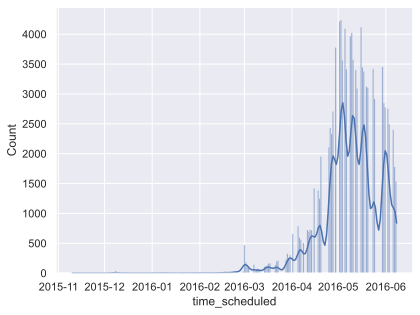

In [49]:
# Showing the distribution of the variable across the timeline
sns.histplot(data=df, x="time_scheduled", kde=True);

We observe that the variable is left-skewed. Most of the appointments were scheduled in May.

In [50]:
# Check the 'median' date (the date in which 50% of the appointments were scheduled before, and 50% after)
time_num = np.array(df['time_scheduled'])
time_num[int((time_num.size-1)/2)]

Timestamp('2016-05-10 00:00:00+0000', tz='UTC')

50% of the appointments were scheduled between 10/11/2015-10/5/2016

The other 50% were scheduled between 10/5/2016-8/6/2016

### 🔎 Exploring the `days_from_appointment` Variable

In [51]:
df['days_from_appointment'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_from_appointment, dtype: float64

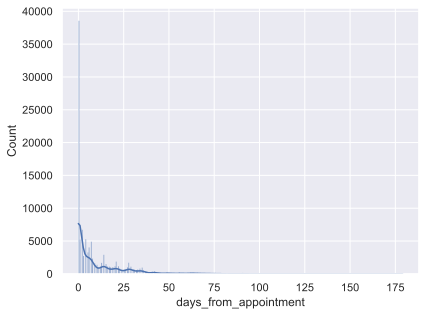

In [52]:
# Showing the distribution of the variable via histogram
sns.histplot(data=df, x="days_from_appointment", kde=True);

- We see that the variable is skewed to the right
- We see that at least 25% of the appointments were scheduled on the same day of the appointment
- We see that at least 50% of the appointments were scheduled less than 4 days ahead
- We see that at least 75% of the appointments were scheduled less than 15 days ahead

### 🔎 Exploring the `appointment_day_of_week` Variable

In [53]:
df['appointment_day_of_week'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: appointment_day_of_week, dtype: int64

No appointments were held on Sunday.

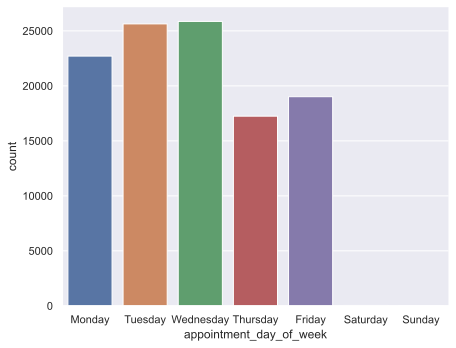

In [54]:
sns.catplot(x='appointment_day_of_week', kind="count", data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], aspect=1.3);

Appointments are scheduled (and held) between Monday to Friday (only 0.3% on Saturday). Wednesday is the most scheduled day, and Thursday is the least one. 

### 🔎 Exploring the `age` Variable

In [55]:
df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

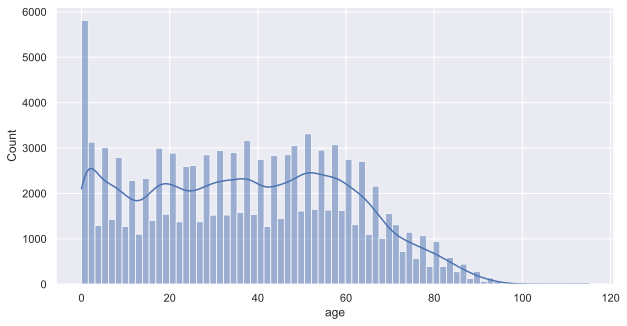

In [56]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df, x="age", kde=True);

Age is also skewed to the right, with 75% of the appointments are of people who are less than 55.

In [57]:
df.head()

,appointment_id,time_scheduled,days_from_appointment,appointment_date,appointment_day_of_week,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show
0,5030230,2015-11-10 00:00:00+00:00,176,2016-05-04 00:00:00+00:00,Wednesday,Resistência,832256398961987,51,F,0,0,0,0,0,1,0
1,5122866,2015-12-03 00:00:00+00:00,151,2016-05-02 00:00:00+00:00,Monday,Vila Rubim,91637474953513,34,M,1,0,0,0,0,1,1
2,5134197,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,São Cristóvão,1216586867796,27,F,0,0,0,0,1,1,1
3,5134220,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,Maruípe,31899595421534,48,F,1,0,1,0,0,1,0
4,5134223,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,São Cristóvão,9582232334148,80,F,1,0,1,0,0,1,0


### 🔎 Exploring the `gender` Variable

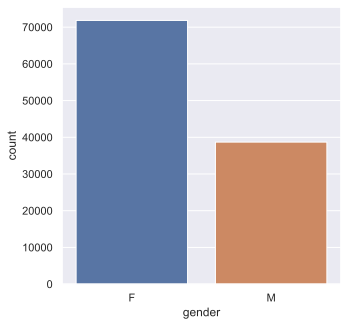

In [58]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x="gender", data=df);

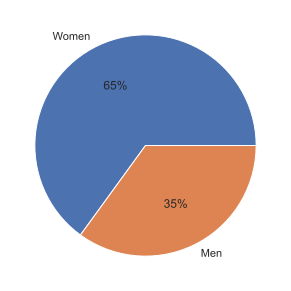

In [59]:
plt.pie(df['gender'].value_counts(), autopct='%.0f%%', labels=['Women','Men'])
plt.show()

### 🔎 Exploring `did_receive_sms` Variable

In [60]:
df['did_receive_sms'].describe()

count    110521.000000
mean          0.321043
std           0.466879
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: did_receive_sms, dtype: float64

50% of the scheduled appointments did not receive an SMS.

Let's check the days before the appointment on which SMS has been received.

In [61]:
df[df['did_receive_sms'] == 1]['days_from_appointment'].value_counts().sort_index()

3       906
4      3054
5      2054
6      2684
7      2850
       ... 
151       1
155       9
169       7
176      13
179       7
Name: days_from_appointment, Length: 121, dtype: int64

We see that SMS did not received when appointments were scheduled less than 3 days ahead.

Becuase we saw that 50% of the appointments were scheduled only 4 (or less) days in advance, we need to take this into consideration.

## ❓ Answering Questions

### ❓ What is the proportion of no-shows?

In [62]:
# We will use boostrapping to estimate the proportion of no-shows
no_shows = np.array(df['no_show'])

# taking 10000 times a the data (with replacement),
# estimating the proportions, and enter it to proporitons variable
proportions = [np.random.choice(no_shows , no_shows.size).mean() for _ in range(10000)]

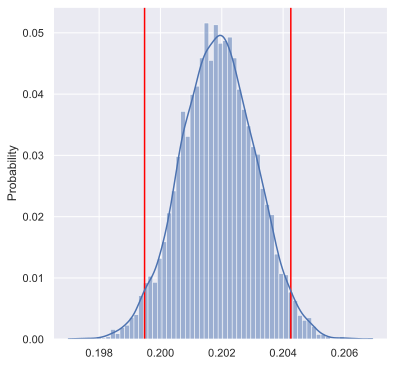

In [63]:
# plotting the distribution of the proportions 
sns.set(rc={'figure.figsize':(6,6)})
lower, upper = np.percentile(proportions, 2.5), np.percentile(proportions, 97.5)
plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
sns.histplot(proportions, stat='probability', kde=True);

In [82]:
# Print estimations
print("With 95% confidence, the percentage of no-shows is between " + str(round(lower, 3)*100) + "% and " + str(round(upper, 3)*100) + "%")

With 95% confidence, the percentage of no-shows is between 19.900000000000002% and 20.4%


We estimate there are about 20% no-shows regardless any other factor.

### ❓ What factors are correlated with no-shows?

In [65]:
# Checking if days from appointment is correlated with no_show
import scipy.stats as stats
x = np.array(df['days_from_appointment'])
y = np.array(df['no_show'])
#calculate point-biserial correlation
stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.18631962066746582, pvalue=0.0)

There is a weak correlation between the variables.

In [66]:
# Checking if age is correlated with no_show
import scipy.stats as stats
x = np.array(df['age'])
y = np.array(df['no_show'])
#calculate point-biserial correlation
stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.06031958954185393, pvalue=1.3200839804866788e-89)

There is a weak correlation between the variables.

In [67]:
# Checking if gender is correlated with no_show
import scipy.stats as stats
x = np.array(df['gender'].replace(['M', 'F'], [0,1]))
y = np.array(df['no_show'])
#calculate point-biserial correlation
stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.004131879616526528, pvalue=0.16955929285365584)

There is no correlation between the variables.

In [68]:
# Checking if hypertension is correlated with no_show
import scipy.stats as stats
x = np.array(df['has_hypertension'])
y = np.array(df['no_show'])
#calculate point-biserial correlation
stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.03566231882102261, pvalue=1.9219118195149742e-32)

There is a weak correlation between the variables.

### ❓ Does the proportion of no-shows among men is different than the proportion among women?

In [69]:
# We will conduct a chi-square test

# Show the number of shows and no-shows for men and women in the dataset
df.groupby(['gender'])['no_show'].value_counts()

gender  no_show
F       0          57245
        1          14591
M       0          30962
        1           7723
Name: no_show, dtype: int64

In [70]:
tab_data = [[14591,57245],[7723,30962]]
results = stats.chi2_contingency(tab_data)

In [71]:
# Printing the p-value (if less than 5% we conclude that there is no difference)
print("The p-value is " + str(round(results[1], 3)*100) + "%")

The p-value is 17.2%


**Conclusion:** There is no evidence that there is a difference between men and women in not-showing to an appointment.

### ❓ Is there a difference in no-show proportions between people who got an SMS reminder and people who don't?

Because we saw earlier that SMS is not received when appointments are scheduled less than 3 days ahead, I have decided to analyze data only for days (`days_from_appointmnet`) were both SMS have been received and not have been received.

In [72]:
# Days when SMS was received
sms_days = df[df['did_receive_sms']==1]['days_from_appointment'].value_counts().sort_index()
# Days when SMS wasn't received
no_sms_days = df[df['did_receive_sms']==0]['days_from_appointment'].value_counts().sort_index()

# Prepare a list of days (indecies) where sms received and not received
lst_1 = list(sms_days.index)
lst_2 = list(no_sms_days.index)
lst_days = []
for i in lst_1:
    if i in lst_2:
        lst_days.append(i)

In [73]:
# Prepare a new DataFrame with the desired data for analysis
df_test = df[df['days_from_appointment'].isin(lst_days)]
df_test.head()

,appointment_id,time_scheduled,days_from_appointment,appointment_date,appointment_day_of_week,neighborhood,patient_id,age,gender,has_hypertension,num_of_disabilities,has_diabetes,is_alcoholic,has_scholarship,did_receive_sms,no_show
0,5030230,2015-11-10 00:00:00+00:00,176,2016-05-04 00:00:00+00:00,Wednesday,Resistência,832256398961987,51,F,0,0,0,0,0,1,0
2,5134197,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,São Cristóvão,1216586867796,27,F,0,0,0,0,1,1,1
3,5134220,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,Maruípe,31899595421534,48,F,1,0,1,0,0,1,0
4,5134223,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,São Cristóvão,9582232334148,80,F,1,0,1,0,0,1,0
5,5134224,2015-12-07 00:00:00+00:00,179,2016-06-03 00:00:00+00:00,Friday,São Cristóvão,3516253533716,74,F,1,0,1,0,0,1,0


In [74]:
# Check the frequencies for the four groups for chi-square test
df_test.groupby(['did_receive_sms'])['no_show'].value_counts()

did_receive_sms  no_show
0                0          16494
                 1           8016
1                0          25668
                 1           9770
Name: no_show, dtype: int64

In [75]:
# Perform a chi-square test
tab_data = [[16494,8016],[25668,9770]]
results = stats.chi2_contingency(tab_data)

# Printing the p-value (if higher than 5% we conclude that there is no difference)
print("The p-value is " + str(round(results[1], 3)*100) + "%")

The p-value is 0.0%


**Conclusion:** There is a statistical evidence for difference in proportion of no-shows between people who got and people who didn't get an SMS.

If we calculate the proportions we see 32.7% no-shows for appointments where people didn't get an SMS and 27.6% for appointments were people got.

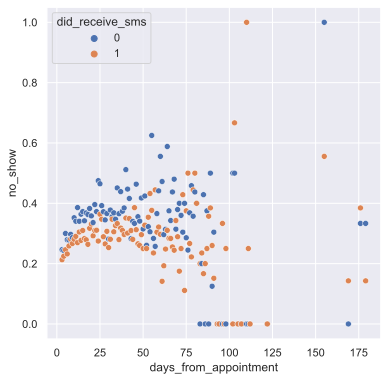

In [76]:
# Scatter plot the data to compare the proportion of no-shows between those who receive SMS and those who don't on the tested DataFrame
scat = df_test.groupby(['days_from_appointment','did_receive_sms']).mean()
sns.scatterplot(data=scat, x="days_from_appointment", y="no_show", hue='did_receive_sms');

We can clearly see that for appointments that were scheduled up to 75 days ahead, the proportion of no-shows for those who received an SMS and those who don't is lower (the orange dots are lower on the Y axis than the blue dots).

### ❓ How can we predict no-shows?

In [77]:
# Logistic regression
import statsmodels.api as sm

# Create a copy of the DataFrame
df_log = df.copy()

df_log['intercept'] = 1
logit_mod = sm.Logit(df_log['no_show'], df_log[['intercept','days_from_appointment']])
result = logit_mod.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.487885
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                no_show   No. Observations:               110521
Model:                          Logit   Df Residuals:                   110519
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Sep 2022   Pseudo R-squ.:                 0.03009
Time:                        13:05:13   Log-Likelihood:                -53922.
converged:                       True   LL-Null:                       -55595.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -1.6779      0.010   -175.079      0.000      -1.697      -1.659
days_from_appointment     0.0259      0.000     57.537      0.000       0.025       0.027
=========================================================================================
"""